<a href="https://colab.research.google.com/github/rekhareddy2908/applied-deep-learning-/blob/main/gan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1/1 [==============================] - 0s 65ms/step


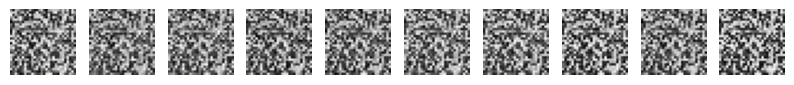

In [14]:
#GAN
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
# Define the generator model
def build_generator(latent_dim):
  model = Sequential()
  model.add(Dense(128, input_dim=latent_dim, activation='relu'))
  model.add(Dense(784, activation='sigmoid'))
  model.add(Reshape((28, 28, 1)))
  return model
# Define the discriminator model
def build_discriminator(input_shape):
  model = Sequential()
  model.add(Flatten(input_shape=input_shape))
  model.add(Dense(128, activation='relu'))
  model.add(Dense(1, activation='sigmoid'))
  return model
# Define the GAN model that combines the generator and discriminator
def build_gan(generator, discriminator):
  discriminator.trainable = False
  model = Sequential()
  model.add(generator)
  model.add(discriminator)
  return model
# Load and preprocess the dataset (e.g., MNIST)
from tensorflow.keras.datasets import mnist
(X_train, _), (_, _) = mnist.load_data()
X_train = X_train / 255.0
# Normalize pixel values to the range [0, 1]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
# Set hyperparameters
latent_dim = 100
epochs = 100
batch_size = 64
# Build and compile the generator, discriminator, and GAN models
generator = build_generator(latent_dim)
discriminator = build_discriminator(X_train[0].shape)
gan = build_gan(generator, discriminator)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002,
beta_1=0.5))
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))
# Training loop
for epoch in range(epochs):
  idx = np.random.randint(0, X_train.shape[0], batch_size)
  real_images = X_train[idx]
  labels_real = np.ones((batch_size, 1))
  labels_fake = np.zeros((batch_size, 1))
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  generated_images = generator.predict(noise)
  d_loss_real = discriminator.train_on_batch(real_images, labels_real)
  d_loss_fake = discriminator.train_on_batch(generated_images, labels_fake)
  d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)
  noise = np.random.normal(0, 1, (batch_size, latent_dim))
  labels_gan = np.ones((batch_size, 1))
  g_loss = gan.train_on_batch(noise, labels_gan)
# Print progress
if (epoch + 1) % 1000 == 0:
  print(f"Epoch {epoch + 1}/{epochs} - D Loss: {d_loss} - G Loss: {g_loss}")
# Save generated images at specified intervals
if (epoch + 1) % 1000 == 0:
  num_samples = 10
  noise = np.random.normal(0, 1, (num_samples, latent_dim))
  generated_images = generator.predict(noise)
  plt.figure(figsize=(10, 2))
  for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
    plt.axis('off')
    plt.savefig(f"gan_generated_image_epoch_{epoch + 1}.png")
    plt.close()
# Generate and save final images
num_samples = 10
noise = np.random.normal(0, 1, (num_samples, latent_dim))
generated_images = generator.predict(noise)
plt.figure(figsize=(10, 2))
for i in range(num_samples):
  plt.subplot(1, num_samples, i + 1)
  plt.imshow(generated_images[i].reshape(28, 28), cmap='gray')
  plt.axis('off')
  plt.savefig("final_generated_images.png")
plt.show()